# Hyperparameter Tuning for Sentiment Analysis with SVM

This notebook demonstrates hyperparameter optimization for a Linear SVM model to perform sentiment analysis. We'll track experiments with MLflow and find the best model configuration.

## Setup and Imports

In [2]:
import numpy as np
import mlflow
import pandas as pd

import sys
sys.path.append('..')
from src.models.train_models import ModelTrainer
from src.models.predict_models import ModelPredictor
from src.config import *

## Define Hyperparameter Grid

We'll create a grid of hyperparameters to search through:

- **C values**: Regularization strength (inverse) - smaller values specify stronger regularization
- **Penalty types**: The norm used in penalization (L1 or L2)
- **Max iterations**: Maximum number of iterations for the solver

In [3]:
# Define hyperparameter grids to search
C_values = [0.1, 0.5, 1.0, 2.0, 5.0]
penalty_values = ['l1', 'l2']
max_iter_values = [100, 500, 1000]

## Hyperparameter Grid Search

Now we'll run through all valid combinations of hyperparameters and track the results using MLflow.

In [4]:
results = []

for c in C_values:
    for penalty in penalty_values:
        for max_iter in max_iter_values:
            print(f"Training with C={c}, Penalty={penalty}, Max iterations={max_iter}")
            try:
                run_id = ModelTrainer.svm(C=c, penalty=penalty, max_iter=max_iter)

                with mlflow.start_run(run_id=run_id):
                    run = mlflow.get_run(run_id)
                    metrics = run.data.metrics
                    params = run.data.params

                    results.append({
                        'run_id': run_id,
                        'C': params.get('C'),
                        'penalty': params.get('penalty'),
                        'max_iter': params.get('max_iter'),
                        'train_accuracy': metrics.get('train_accuracy'),
                        'test_accuracy': metrics.get('test_accuracy'),
                        'test_precision': metrics.get('test_precision'),
                        'test_recall': metrics.get('test_recall'),
                        'test_f1': metrics.get('test_f1'),
                    })
            except Exception as e:
                print(f"Error training with C={c}, Penalty={penalty}, Max iterations={max_iter}: {e}")
                continue

Training with C=0.1, Penalty=l1, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  from .autonotebook import tqdm as notebook_tqdm



Training with C=0.1, Penalty=l1, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Penalty=l1, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Penalty=l2, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Penalty=l2, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Penalty=l2, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.5, Penalty=l1, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=0.5, Penalty=l1, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.5, Penalty=l1, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.5, Penalty=l2, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.5, Penalty=l2, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.5, Penalty=l2, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Penalty=l1, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=1.0, Penalty=l1, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Penalty=l1, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Penalty=l2, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Penalty=l2, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Penalty=l2, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=2.0, Penalty=l1, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=2.0, Penalty=l1, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=2.0, Penalty=l1, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=2.0, Penalty=l2, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=2.0, Penalty=l2, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=2.0, Penalty=l2, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=5.0, Penalty=l1, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=5.0, Penalty=l1, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=5.0, Penalty=l1, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=5.0, Penalty=l2, Max iterations=100
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training with C=5.0, Penalty=l2, Max iterations=500
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=5.0, Penalty=l2, Max iterations=1000
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


## Print All Model Test Accuracies

Let's display the test accuracies for all models, sorted by performance.


All Models Test Accuracies (sorted):

  C penalty max_iter  test_accuracy
0.5      l2      500       0.880739
0.5      l2      100       0.880739
0.5      l2     1000       0.880739
1.0      l2     1000       0.879741
1.0      l2      500       0.879741
1.0      l2      100       0.879741
0.5      l1      100       0.876747
2.0      l2      100       0.875499
2.0      l2      500       0.875499
2.0      l2     1000       0.875499
0.5      l1      500       0.875250
0.5      l1     1000       0.875250
1.0      l1      100       0.871507
1.0      l1      500       0.871008
1.0      l1     1000       0.871008
0.1      l2      100       0.870509
0.1      l2      500       0.870509
0.1      l2     1000       0.870509
2.0      l1     1000       0.868263
2.0      l1      500       0.868263
2.0      l1      100       0.864521
5.0      l2      500       0.862275
5.0      l2     1000       0.862275
5.0      l2      100       0.862275
5.0      l1      500       0.854790
5.0      l1      100     

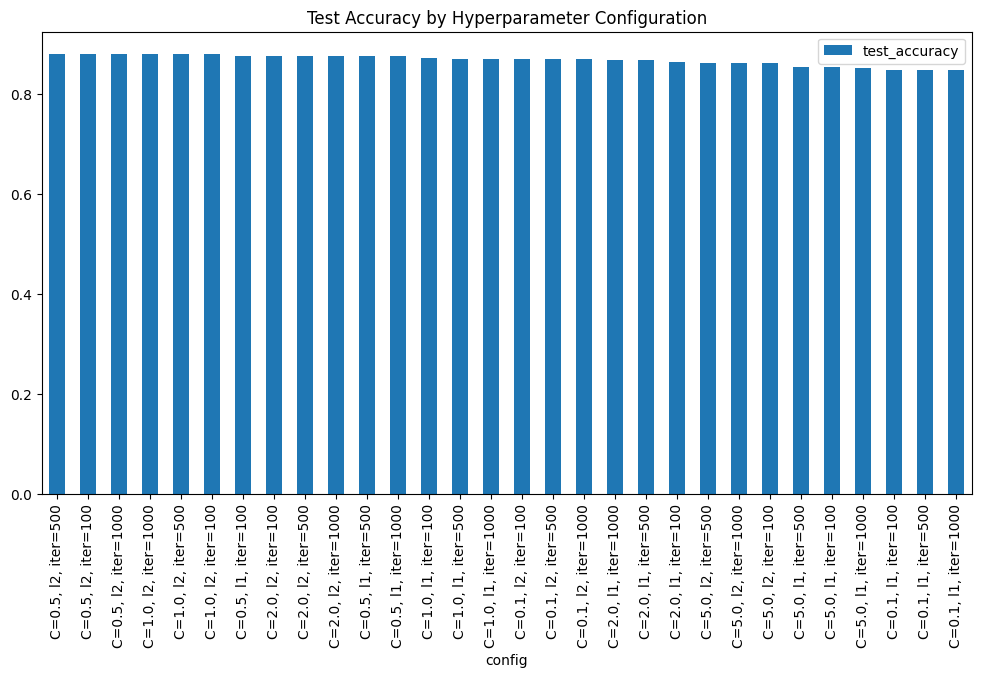

In [5]:
# Create dataframe from results
results_df = pd.DataFrame(results)

# Print all model test accuracies, sorted from best to worst
if not results_df.empty and 'test_accuracy' in results_df.columns:
    sorted_results = results_df.sort_values('test_accuracy', ascending=False)
    
    print("\nAll Models Test Accuracies (sorted):\n")
    print(sorted_results[['C', 'penalty', 'max_iter', 'test_accuracy']].to_string(index=False))
    
    # Create a combined label for each configuration
    sorted_results['config'] = sorted_results.apply(
        lambda row: f"C={row['C']}, {row['penalty']}, iter={row['max_iter']}", axis=1)
    
    # Plot with the combined label
    sorted_results.plot(
        kind='bar', x='config', y='test_accuracy', figsize=(12, 6),
        title='Test Accuracy by Hyperparameter Configuration'
    )
else:
    print("\nNo successful model runs found with test_accuracy metric.")

## Analyzing Results and Finding the Best Model

In [6]:
# Find the best model
if not results_df.empty and 'test_accuracy' in results_df.columns:
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
    best_run_id = best_model['run_id']
    
    print("\nBest model:")
    print(f"C: {best_model['C']}, Penalty: {best_model['penalty']}, Max iterations: {best_model['max_iter']}")
    
    # Print test metrics
    print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")
    
    # Check and print other test metrics if they exist
    for metric in ['test_f1', 'test_precision', 'test_recall']:
        if metric in best_model:
            print(f"{metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
    
    # Print train metrics
    if 'train_accuracy' in best_model:
        print(f"Train Accuracy: {best_model['train_accuracy']:.4f}")
    
    # Check and print other train metrics if they exist
    for metric in ['train_f1', 'train_precision', 'train_recall']:
        if metric in best_model:
            print(f"{metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
    
    print(f"Run ID: {best_run_id}")
else:
    print("\nNo successful model runs found with test_accuracy metric.")
    best_run_id = None


Best model:
C: 0.5, Penalty: l2, Max iterations: 100
Test Accuracy: 0.8807
Test F1: 0.8759
Test Precision: 0.8762
Test Recall: 0.8807
Train Accuracy: 0.9505
Run ID: 4d4fbef223a94b16b4275a40a565690c


## Making Predictions with the Best Model

In [7]:
if best_run_id is not None:
    # Prediction with the best model found
    texts = np.array(["This product works great!", "Terrible experience..."])
    predictions = ModelPredictor.predict(best_run_id, texts)

    print(f"\nPredictions with Best Model (Run ID: {best_run_id[:8]}...):\n")
    for text, pred in zip(texts, predictions):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"'{text}' -> {sentiment}")


Predictions with Best Model (Run ID: 4d4fbef2...):

'This product works great!' -> Positive
'Terrible experience...' -> Negative
